In [10]:
import pandas as pd

# Load CSV with tab separator
df = pd.read_csv("../data/sierra_leone.csv", sep="\t", engine="python")

# Inspect columns
print(df.columns.tolist())
print(df.head())


['YEAR', 'MO', 'DY', 'T2M', 'WS10M_MIN']
   YEAR  MO  DY    T2M  WS10M_MIN
0  2025   1   1  24.19       2.12
1  2025   1   2  24.41       0.79
2  2025   1   3  25.18       0.65
3  2025   1   4  25.58       0.96
4  2025   1   5  24.80       1.41


In [11]:
# Quick summary of data
print(df.info())
print(df.describe())

# Check for missing values
print(df.isna().sum())

# Drop any rows with missing essential data
df = df.dropna(subset=["YEAR", "MO", "DY", "T2M", "WS10M_MIN"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       315 non-null    int64  
 1   MO         315 non-null    int64  
 2   DY         315 non-null    int64  
 3   T2M        315 non-null    float64
 4   WS10M_MIN  315 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 12.4 KB
None
         YEAR          MO          DY         T2M   WS10M_MIN
count   315.0  315.000000  315.000000  315.000000  315.000000
mean   2025.0    5.717460   15.374603   17.127460   -8.058857
std       0.0    2.998861    8.855132   99.806696   97.327086
min    2025.0    1.000000    1.000000 -999.000000 -999.000000
25%    2025.0    3.000000    8.000000   25.785000    0.885000
50%    2025.0    6.000000   15.000000   26.830000    1.520000
75%    2025.0    8.000000   23.000000   27.815000    2.010000
max    2025.0   11.000000   31.000000   29.850000    3.190000
YE

         YEAR          MO          DY         T2M   WS10M_MIN
count   315.0  315.000000  315.000000  315.000000  315.000000
mean   2025.0    5.717460   15.374603   17.127460   -8.058857
std       0.0    2.998861    8.855132   99.806696   97.327086
min    2025.0    1.000000    1.000000 -999.000000 -999.000000
25%    2025.0    3.000000    8.000000   25.785000    0.885000
50%    2025.0    6.000000   15.000000   26.830000    1.520000
75%    2025.0    8.000000   23.000000   27.815000    2.010000
max    2025.0   11.000000   31.000000   29.850000    3.190000


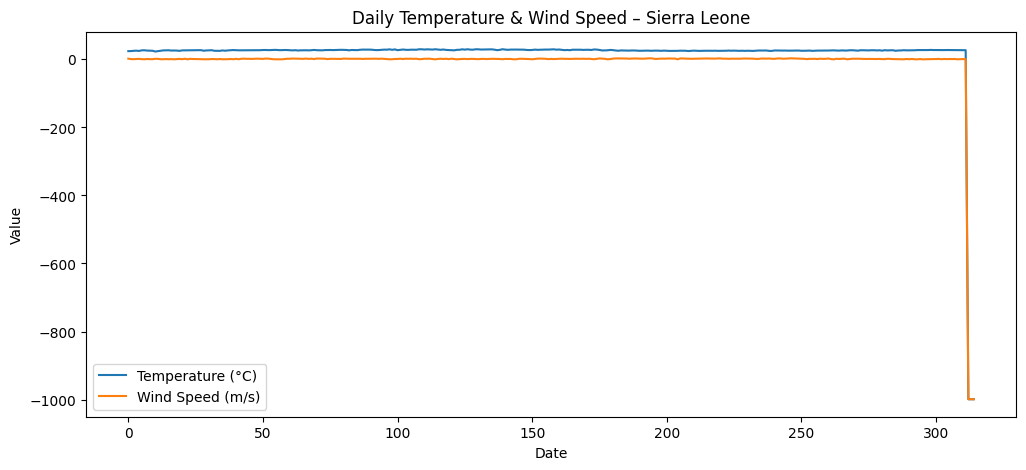

In [13]:
# Summary stats
print(df.describe())

# Plot temperature & wind speed trends
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df.index, df["T2M"], label="Temperature (°C)")
plt.plot(df.index, df["WS10M_MIN"], label="Wind Speed (m/s)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Daily Temperature & Wind Speed – Sierra Leone")
plt.legend()
plt.show()


In [ ]:
# Outlier Detection (Z-score)
from scipy import stats
import numpy as np

# Compute Z-scores
z_scores = np.abs(stats.zscore(df[["T2M", "WS10M_MIN"]]))

# Flag rows where |Z|>3
outliers = (z_scores > 3).any(axis=1)
print("Number of outliers:", outliers.sum())

# Optionally, remove or impute
df_clean = df[~outliers]  # remove outliers
# or use median imputation:
# df["T2M"].fillna(df["T2M"].median(), inplace=True)


Number of outliers: 3


In [15]:
# Save Cleaned CSV
df_clean.to_csv("../data/sierra_leone_clean.csv", index=True)
